In [4]:
import requests
import networkx
import time
import collections
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import importlib as imp
import main

In [5]:
%matplotlib inline

In [6]:
sns.set(style="white", color_codes=True)

In [7]:
# imp.reload(main)

## 1. My network summary

### 1.1. Network source and preprocessing

Source of my network is **VK**

In [8]:
def get_friends_ids(user_id):
    """
    this function returns list of friends
    """
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}'
    json_response = requests.get(friends_url.format(user_id)).json()
    if json_response.get('error'):
        return list()
    return json_response[u'response']

In [9]:
def get_friends_info(user_id):
    """
    this function returns infromation about friends, like sex, bdate, city, country
    """
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}&fields=sex,bdate,city,country' 
    json_response = requests.get(friends_url.format(user_id)).json()
    if json_response.get('error'):
        return list()
    return json_response[u'response']

In [10]:
graph = {}
friend_ids = get_friends_ids(9106204)
for friend_id in friend_ids:
    graph[friend_id] = get_friends_ids(friend_id)

In [11]:
g = networkx.Graph(directed=False)

In [12]:
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

In [13]:
networkx.write_gml(g, "network.gml")

In [14]:
g = nx.read_gml('network.gml')

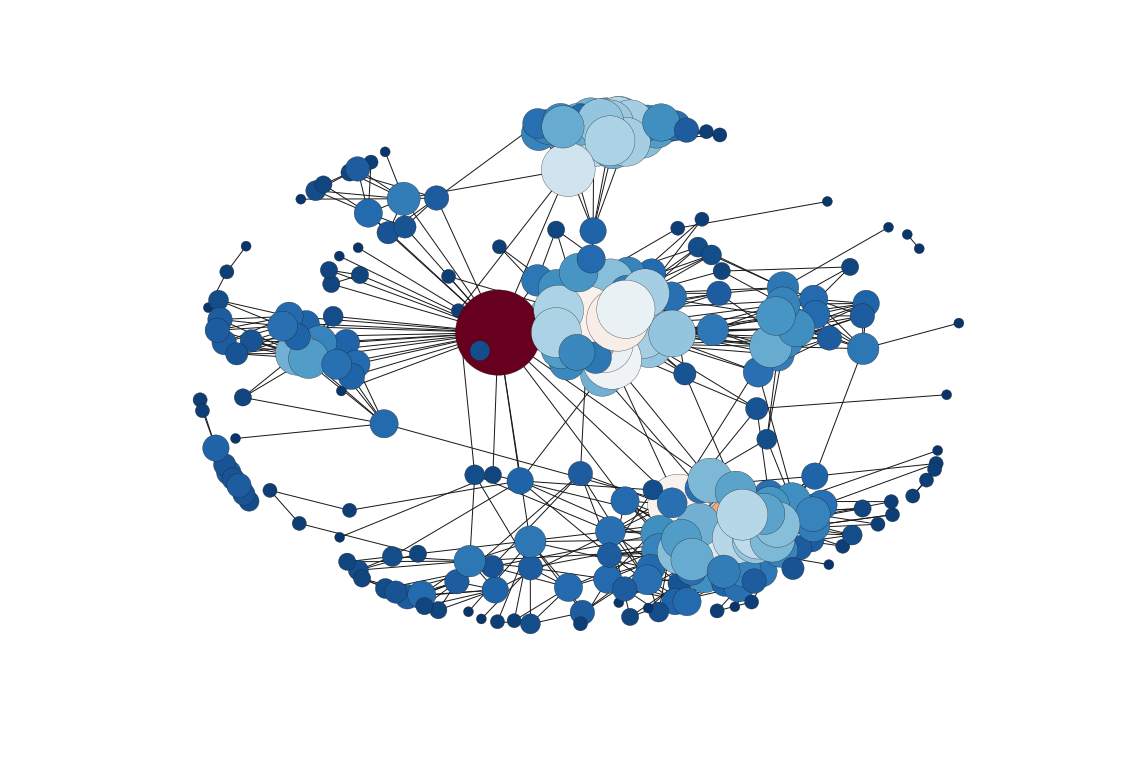

In [58]:
plt.xkcd()
k = nx.degree(g)

plt.figure(1, figsize=(15,10))
coord = nx.spring_layout(g)
# nx.draw_networkx
nx.draw(g,
         pos=coord,
         nodelist=k.keys(),
         node_size = [d*100 for d in k.values()],
         node_color=k.values(),
         font_size=8,
         cmap=plt.cm.get_cmap('RdBu_r'),
         with_labels=False
         )

In [15]:
def print_info_about(id_interest):  
    resp=requests.get('https://api.vk.com/method/users.get?user_ids={}'.format(id_interest)).json()[u'response']
    print resp[0][u'first_name'].strip()+' '+resp[0][u'last_name'].strip()

In [1]:
nom=1
# (15239774, 57),
#  (1480611, 60),
#  (11878404, 65),
#  (13900074, 71),
#  (869755, 76),
# print_info_about(158530417)
# sorted(k.items(), key=lambda x: x[1])

## 2

### 2.1. Compute the degree centrality for nodes.

In [21]:
degree_centrality = networkx.degree_centrality(g)

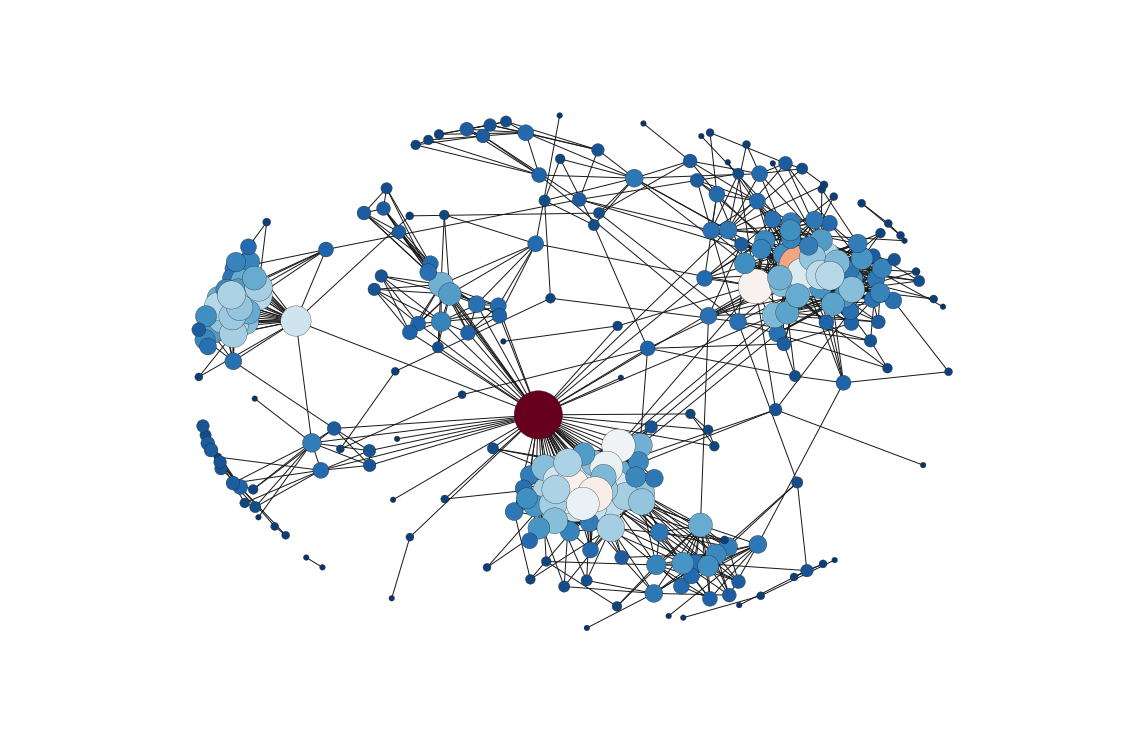

In [26]:
plt.figure(2, figsize=(15,10))
coord = nx.spring_layout(g)
nx.draw(g,
         pos=coord,
         nodelist=degree_centrality.keys(),
         node_size = [d*10000 for d in degree_centrality.values()],
         node_color=degree_centrality.values(),
         font_size=8,
         cmap=plt.cm.get_cmap('RdBu_r'),
         with_labels=False
         )

### 2.1. Compute closeness centrality for nodes.

In [22]:
closeness_centrality = networkx.closeness_centrality(g)

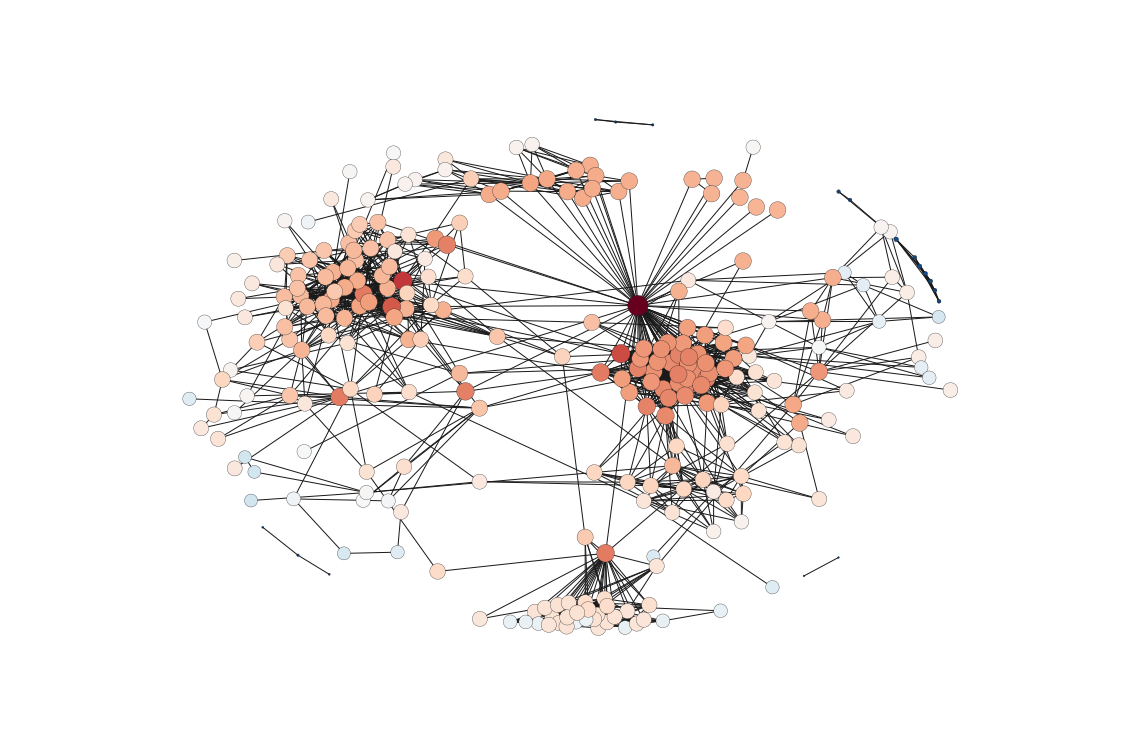

In [29]:
plt.figure(2, figsize=(15,10))
coord = nx.spring_layout(g)
nx.draw(g,
         pos=coord,
         nodelist=closeness_centrality.keys(),
         node_size = [d*1000 for d in closeness_centrality.values()],
         node_color=closeness_centrality.values(),
         font_size=8,
         cmap=plt.cm.get_cmap('RdBu_r'),
         with_labels=False
         )

### 2.1. Compute the shortest-path betweenness centrality for nodes

In [23]:
betweenness_centrality = networkx.betweenness_centrality(g)

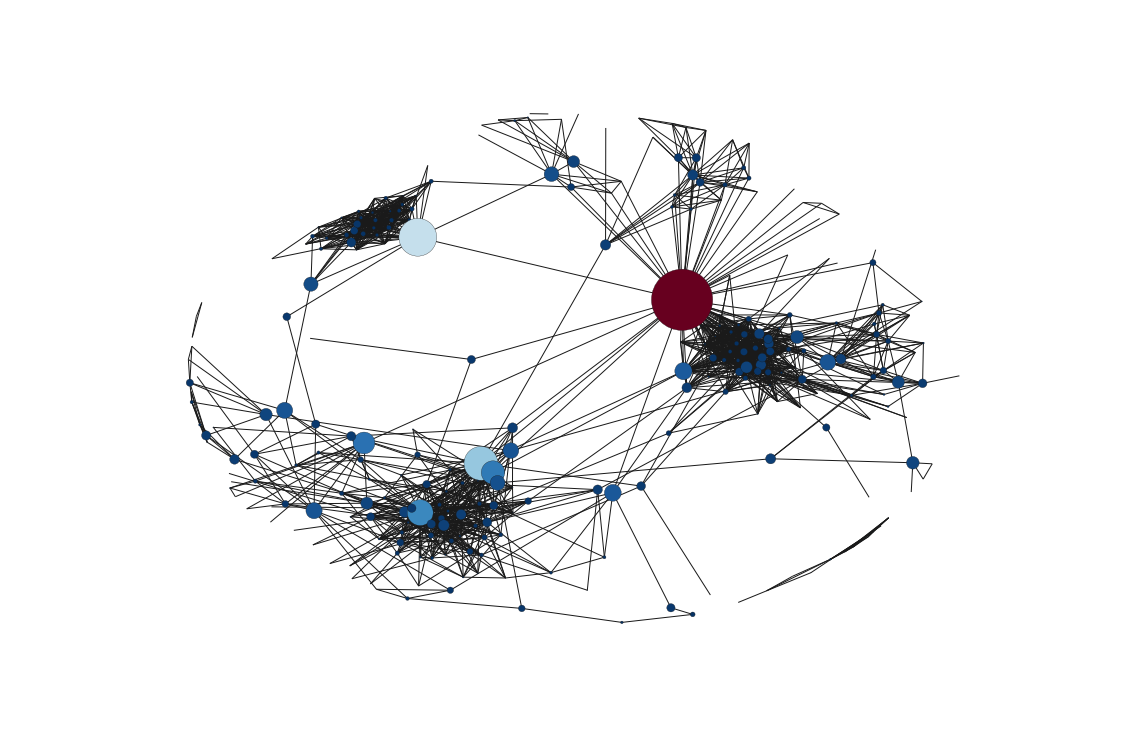

In [27]:
plt.figure(3, figsize=(15,10))
coord = nx.spring_layout(g)
nx.draw(g,
         pos=coord,
         nodelist=betweenness_centrality.keys(),
         node_size = [d*10000 for d in betweenness_centrality.values()],
         node_color=betweenness_centrality.values(),
         font_size=8,
         cmap=plt.cm.get_cmap('RdBu_r'),
         with_labels=False
         )

### Interpretation 

In [30]:
#

### 2.2. Page-Rank

In [33]:
pagerank = networkx.pagerank(g, alpha=0.85)

In [34]:
sorted(pagerank.items(), key=lambda x: x[1])

[(220861450, 0.0005261311820413891),
 (47119, 0.0005261311820413891),
 (101610758, 0.0005261311820413891),
 (132772957, 0.0005261311820413891),
 (259689077, 0.0005261311820413891),
 (210224746, 0.0005261311820413891),
 (11485804, 0.0005261311820413891),
 (222044497, 0.0005261311820413891),
 (45716258, 0.0005261311820413891),
 (17148600, 0.0005261311820413891),
 (242418, 0.0005261311820413891),
 (201557757, 0.0005261311820413891),
 (3472942, 0.0005261311820413891),
 (22040344, 0.0005261311820413891),
 (2714997, 0.0005261311820413891),
 (334226729, 0.0005261311820413891),
 (10387294, 0.0005261311820413891),
 (199521679, 0.0005261311820413891),
 (12829060, 0.0005261311820413891),
 (265257871, 0.0005261311820413891),
 (270793622, 0.0005261311820413891),
 (145750429, 0.0005261311820413891),
 (3712435, 0.0005261311820413891),
 (11439040, 0.0005261311820413891),
 (10864584, 0.0005261311820413891),
 (212314401, 0.0005261311820413891),
 (55344079, 0.0005261311820413891),
 (1838548, 0.0005261311